In [219]:
import pandas as pd
import numpy as np

data= pd.read_csv('global-data-on-sustainable-energy.csv')
missing_values = data.isnull().sum()
length=len(data)
missing_percentage = (missing_values / len(data)) * 100
print(f"Missing values are  :{missing_values}")
print(f"Missing percentages are :{missing_percentage}")

Missing values are  :Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_coun

In [220]:
data_types = data.dtypes
print(data_types)

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [221]:
data_types = data.dtypes
print(data_types)

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [222]:
def remove_functuation(density):
    return density.replace(',','')
data['Entity']=data['Entity'].astype(str)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].astype(str)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].apply(remove_functuation)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].astype(float)

In [223]:
# dropping ALbania as there is no good data available
indices_to_drop = data[data['Entity'] == 'Albania'].index
data.drop(indices_to_drop, inplace=True)

In [224]:
columns=data.columns.tolist()
feature_with_null=[column for column in columns if column not in ['Entity','Year','Primary energy consumption per capita (kWh/person)']]
feature_with_null

['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [225]:
data.replace({None: np.nan}, inplace=True)

columns=['Financial flows to developing countries (US $)','Renewable-electricity-generating-capacity-per-capita','Renewables (% equivalent primary energy)']
data.drop(columns=columns,inplace=True)

columns=data.columns.tolist()
feature_with_null=[column for column in columns if column not in ['Entity','Year','Primary energy consumption per capita (kWh/person)']]

for column in feature_with_null:
    # Group by 'Country_Encoded' and calculate the mean for each group
    means = data.groupby('Entity')[column].transform('mean')

    # If the mean is NaN, replace it with the global mean of the column
    global_mean = data[column].mean()
    means_filled = means.fillna(global_mean)

    # Fill the missing values with the calculated means
    data[column] = data[column].fillna(means_filled)

zero_columns=['Electricity from nuclear (TWh)','Electricity from renewables (TWh)','Low-carbon electricity (% electricity)']
data.drop(columns=zero_columns,inplace=True, axis=1)




In [226]:
zero_counts=(data==0).sum()
print(zero_counts)

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     8
Renewable energy share in the total final energy consumption (%)     97
Electricity from fossil fuels (TWh)                                 130
Primary energy consumption per capita (kWh/person)                   21
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           0
Value_co2_emissions_kt_by_country                                     0
gdp_growth                                                            1
gdp_per_capita                                                        0
Density\n(P/Km2)                                                      0
Land Area(Km2)                                                        0
Latitude                                                        

In [227]:
columns=data.columns.to_list()

df=data

def rmOutliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of columns to check for outliers
columns_to_check = [
    'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

print (columns_to_check)

# Apply the function to each group of entities
df_cleaned = df.groupby('Entity').apply(lambda x: rmOutliers(x, columns_to_check)).reset_index(drop=True)

['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


In [228]:
data=df_cleaned
print(f"Total Outliers Removed considering for each country are:{df.count()-df_cleaned.count()}")

Total Outliers Removed considering for each country are:Entity                                                              792
Year                                                                792
Access to electricity (% of population)                             792
Access to clean fuels for cooking                                   792
Renewable energy share in the total final energy consumption (%)    792
Electricity from fossil fuels (TWh)                                 792
Primary energy consumption per capita (kWh/person)                  792
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         792
Value_co2_emissions_kt_by_country                                   792
gdp_growth                                                          792
gdp_per_capita                                                      792
Density\n(P/Km2)                                                    792
Land Area(Km2)                                                      792
Latitude

## Data Quality Plan

### Issues Found:

**High Missing Value Rate**: Most columns have missing values. Columns like **Financial flows to developing countries (US $)** and **Renewables (% equivalent primary energy)** have a missing rate over 50%.

**Type Inconsistency**: The type of columns like **Entity** and **Density\n(P/Km2)** is Object. They should be string and float instead. Additionally, **Density\n(P/Km2)** has commas in the values, which prevents direct processing.

**Outliers**: The dataset contains outliers, which can lead to poor model performance.

### Solution:

We imputed the missing values with mean values to avoid losing too many data points. For type conversion, **Entity** was converted to a string. **Density\n(P/Km2)** was first converted to a string to remove the commas, and then it was converted to float. To handle outliers, we implemented a method to remove all values below the lower bound and above the upper bound, determined by the Interquartile Range (IQR) of each column.


In [229]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import joblib


label_encoder=LabelEncoder()
data['Entity']=label_encoder.fit_transform(data['Entity'])

target_variables = ['Value_co2_emissions_kt_by_country', 'Renewable energy share in the total final energy consumption (%)']

models={
    'Linear Regression':LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Support Vector Regressor':SVR(),
    'Random Forest Regressor':RandomForestRegressor()
}

# Dictionaries to store the metrics
mse_scores = {'CO2 Emissions': [], 'Renewable Energy Share': []}
mae_scores = {'CO2 Emissions': [], 'Renewable Energy Share': []}
r2_scores = {'CO2 Emissions': [], 'Renewable Energy Share': []}

def evaluate_model_with_base_parameters(data, models_dict):
    random_forest_features = []
    for i in range(len(target_variables)):
        target_variable = target_variables[i]
        print(f"Below are the metrics for the target variable: {target_variables[i]}")
        for name, model in models_dict.items():
            if name == 'Support Vector Regressor':
                # Skipping RFE for SVR as it does not have the feature_importances_ or coef_ attribute
                correlation_matrix = data.select_dtypes("number").corr()
                target_features = correlation_matrix[target_variables[i]].drop(target_variables[i])
                target_features = target_features[abs(target_features) > 0.3].index.tolist()
                X = data.drop(columns=target_features)
                y = data[target_variables[i]]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

            else:
                # Applying RFE for other models
                rfe = RFE(estimator=model, n_features_to_select=10)
                X = data.drop(columns=target_variables)
                y = data[target_variables[i]]
                fit = rfe.fit(X, y)
                feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_}).sort_values(by='Ranking')
                final_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].to_list()
                if 'Entity'  not in final_features:
                    final_features.append('Entity')
                if 'Year' not in final_features:
                  final_features.append('Year')
                print(f"Feature importances for {name} are {final_features}")
                X = X[final_features]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                model.fit(X_train, y_train)
                if name == 'Random Forest Regressor':
                    model_filename = f'Random forest regressor model for {target_variables[i]}'
                    joblib.dump(model, model_filename)
                    random_forest_features.append(final_features)  # Capture the features for Random Forest Regressor
                y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            target_key = 'CO2 Emissions' if target_variable == 'Value_co2_emissions_kt_by_country' else 'Renewable Energy Share'
            mse_scores[target_key].append(mse)
            mae_scores[target_key].append(mae)
            r2_scores[target_key].append(r2)

            print(f"Model: {name}")
            print(f"Mean squared error is: {mse}")
            print(f"Mean absolute error is: {mae}")
            print(f"R2 score error is: {r2}")
            print("\n")

    return random_forest_features


random_forest_features=evaluate_model_with_base_parameters(data, models)


Below are the metrics for the target variable: Value_co2_emissions_kt_by_country
Feature importances for Linear Regression are ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Electricity from fossil fuels (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'gdp_growth', 'Density\\n(P/Km2)', 'Latitude', 'Longitude']
Model: Linear Regression
Mean squared error is: 10979689984.581743
Mean absolute error is: 45172.75760390173
R2 score error is: 0.9759640892251914


Feature importances for Decision Tree Regression are ['Entity', 'Year', 'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'gdp_growth', 'gdp_per_capita', 'Land Area(Km2)', 'Longitude']
Model: Decision Tree Regression
Mean squared error is: 24045620242.725395
Mean absolute error is: 16315.244592409814
R2 score err

In [230]:
random_forest_features

[['Year',
  'Access to electricity (% of population)',
  'Electricity from fossil fuels (TWh)',
  'Primary energy consumption per capita (kWh/person)',
  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
  'gdp_growth',
  'gdp_per_capita',
  'Density\\n(P/Km2)',
  'Land Area(Km2)',
  'Longitude',
  'Entity'],
 ['Entity',
  'Access to electricity (% of population)',
  'Access to clean fuels for cooking',
  'Electricity from fossil fuels (TWh)',
  'Primary energy consumption per capita (kWh/person)',
  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
  'Density\\n(P/Km2)',
  'Land Area(Km2)',
  'Latitude',
  'Longitude',
  'Year']]

In [231]:
import matplotlib.pyplot as plt

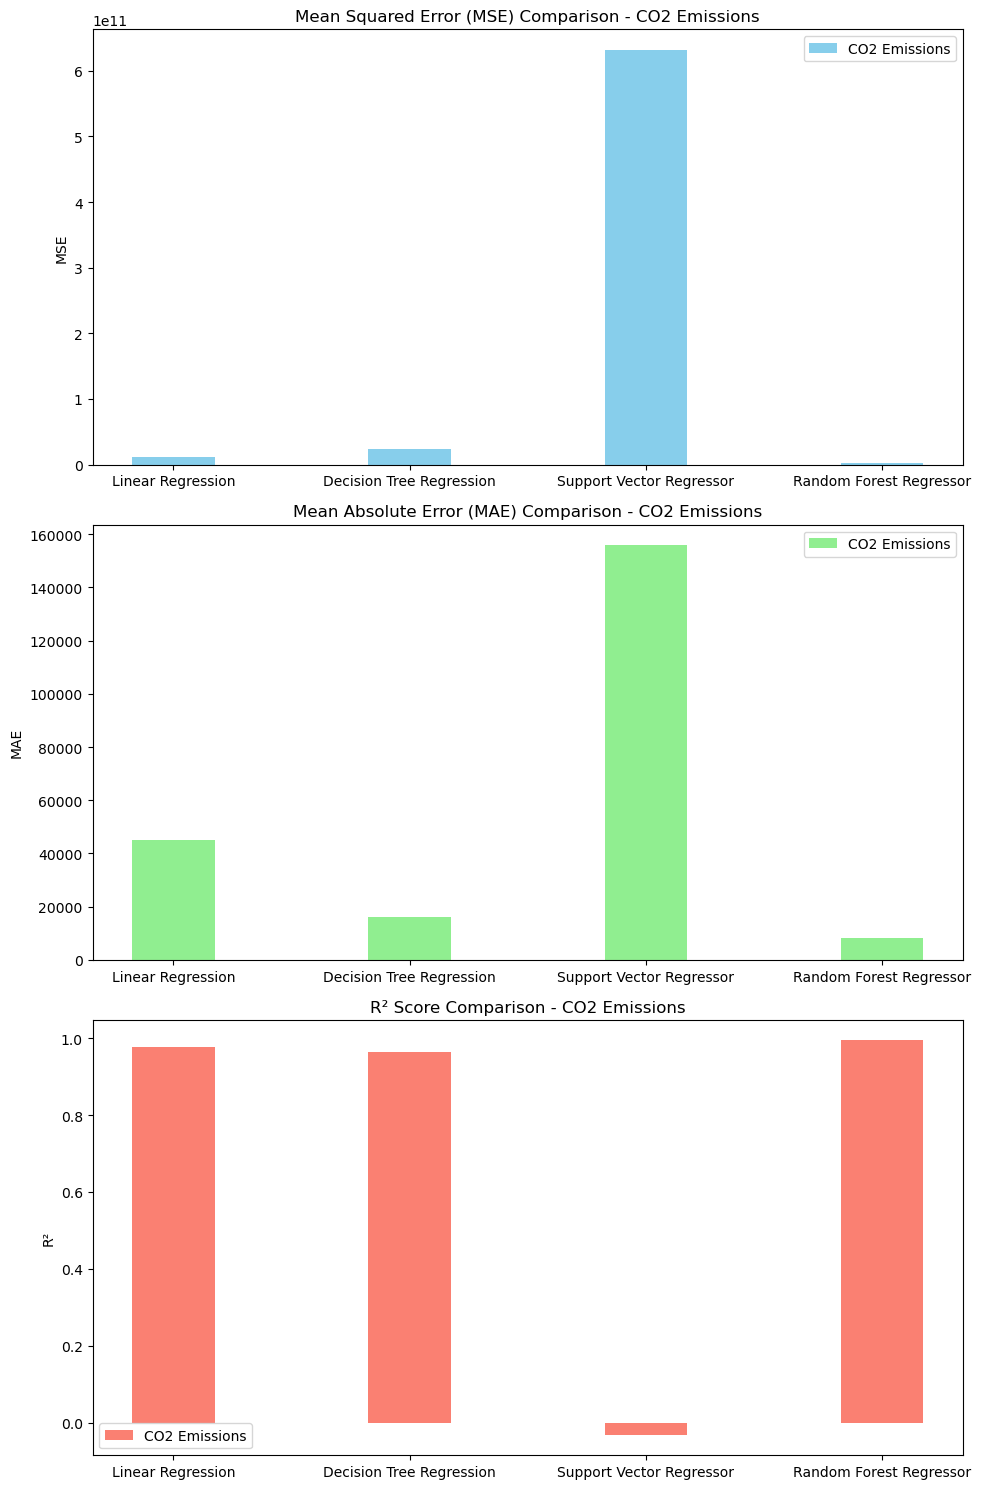

In [232]:
# Visualization for CO2 Emissions
fig, axs = plt.subplots(3, 1, figsize=(10,15))

bar_width = 0.35
index = np.arange(len(models))

# MSE for CO2 Emissions
axs[0].bar(index, mse_scores['CO2 Emissions'], bar_width, label='CO2 Emissions', color='skyblue')
axs[0].set_title('Mean Squared Error (MSE) Comparison - CO2 Emissions')
axs[0].set_ylabel('MSE')
axs[0].set_xticks(index)
axs[0].set_xticklabels(models.keys())
axs[0].legend()

# MAE for CO2 Emissions
axs[1].bar(index, mae_scores['CO2 Emissions'], bar_width, label='CO2 Emissions', color='lightgreen')
axs[1].set_title('Mean Absolute Error (MAE) Comparison - CO2 Emissions')
axs[1].set_ylabel('MAE')
axs[1].set_xticks(index)
axs[1].set_xticklabels(models.keys())
axs[1].legend()

# R2 for CO2 Emissions
axs[2].bar(index, r2_scores['CO2 Emissions'], bar_width, label='CO2 Emissions', color='salmon')
axs[2].set_title('R² Score Comparison - CO2 Emissions')
axs[2].set_ylabel('R²')
axs[2].set_xticks(index)
axs[2].set_xticklabels(models.keys())
axs[2].legend()

plt.tight_layout()
plt.show()

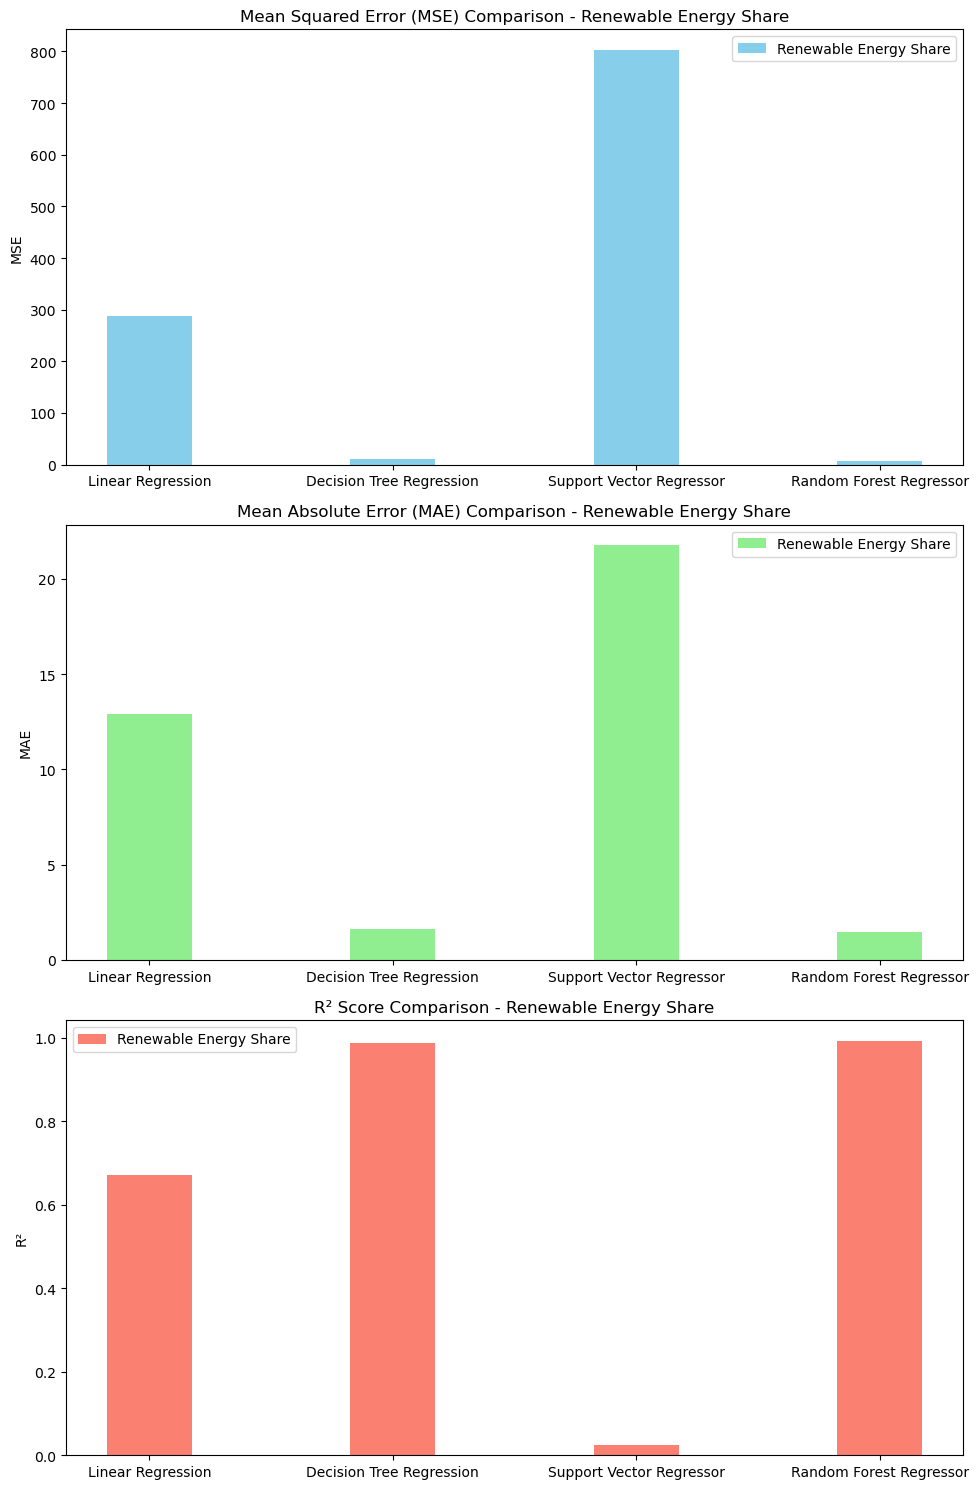

In [233]:
# Visualization for Renewable Energy Share
fig, axs = plt.subplots(3, 1, figsize=(10,15))

# MSE for Renewable Energy Share
axs[0].bar(index, mse_scores['Renewable Energy Share'], bar_width, label='Renewable Energy Share', color='skyblue')
axs[0].set_title('Mean Squared Error (MSE) Comparison - Renewable Energy Share')
axs[0].set_ylabel('MSE')
axs[0].set_xticks(index)
axs[0].set_xticklabels(models.keys())
axs[0].legend()

# MAE for Renewable Energy Share
axs[1].bar(index, mae_scores['Renewable Energy Share'], bar_width, label='Renewable Energy Share', color='lightgreen')
axs[1].set_title('Mean Absolute Error (MAE) Comparison - Renewable Energy Share')
axs[1].set_ylabel('MAE')
axs[1].set_xticks(index)
axs[1].set_xticklabels(models.keys())
axs[1].legend()

# R2 for Renewable Energy Share
axs[2].bar(index, r2_scores['Renewable Energy Share'], bar_width, label='Renewable Energy Share', color='salmon')
axs[2].set_title('R² Score Comparison - Renewable Energy Share')
axs[2].set_ylabel('R²')
axs[2].set_xticks(index)
axs[2].set_xticklabels(models.keys())
axs[2].legend()

plt.tight_layout()
plt.show()

#### Time series forecasting using Prophet

In [234]:
!pip install prophet

In [235]:
# doing the time series forecasting

from prophet import Prophet

In [236]:
# decoding the label encoded columns

# saving the mapping of the label encoders

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping['Afghanistan'])

data['Country_Decoded'] = label_encoder.inverse_transform(data['Entity'])
#data.head()

0


In [237]:
# function to filter the data based on the country based on the user input

def filter_data_by_country(data, country):
  return data[data['Entity']==label_mapping[country]]

In [238]:
# Assuming random_forest_features is defined somewhere in your code
co2_emission_features = random_forest_features[0].copy()
renewable_energy_percentage_features = random_forest_features[1].copy()
features_list = [co2_emission_features, renewable_energy_percentage_features]

# Assuming data_1 is defined somewhere in your code
data_1 = data

for column in features_list:
  column.remove('Year')
  column.remove('Entity')

In [239]:
def predict_all_variables(country, data, input_year):
    pred_dict = {"co2_emission": {}, "renewable_energy_percentage": {}}
    feature_dict_keys = ["co2_emission", "renewable_energy_percentage"]

    for idx, feature_set in enumerate(features_list):
        for column in feature_set:
            country_data = data_1[data_1['Country_Decoded'] == country][['Year', column]].copy()
            country_data['ds'] = pd.to_datetime(country_data['Year'], format='%Y')
            country_data['y'] = country_data[column]
            country_data = country_data[['ds', 'y']]

            m = Prophet()
            m.fit(country_data)

            future = m.make_future_dataframe(periods=15, freq='Y')
            forecast = m.predict(future)
            forecast['ds'] = pd.to_datetime(forecast['ds'])
            forecast['year'] = forecast['ds'].dt.year

            matching_row = forecast[forecast['year'] == input_year]
            if not matching_row.empty:
                pred_dict[feature_dict_keys[idx]][column] = matching_row['yhat'].values[0]
            else:
                pred_dict[feature_dict_keys[idx]][column] = None  # Handle the case where there's no matching row

            # Visualization -
            # a line plot that compares the actual historical data with the 
            # forecasted values from the Prophet model
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(country_data['ds'], country_data['y'], 'b-', label='Actual')
            ax.plot(forecast['ds'], forecast['yhat'], 'r--', label='Predicted')
            ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
            plt.title(f'Actual vs Predicted {column} for {country}')
            plt.xlabel('Year')
            plt.ylabel(column)
            plt.legend()
            plt.show()

    return pred_dict

20:39:56 - cmdstanpy - INFO - Chain [1] start processing
20:39:56 - cmdstanpy - INFO - Chain [1] done processing


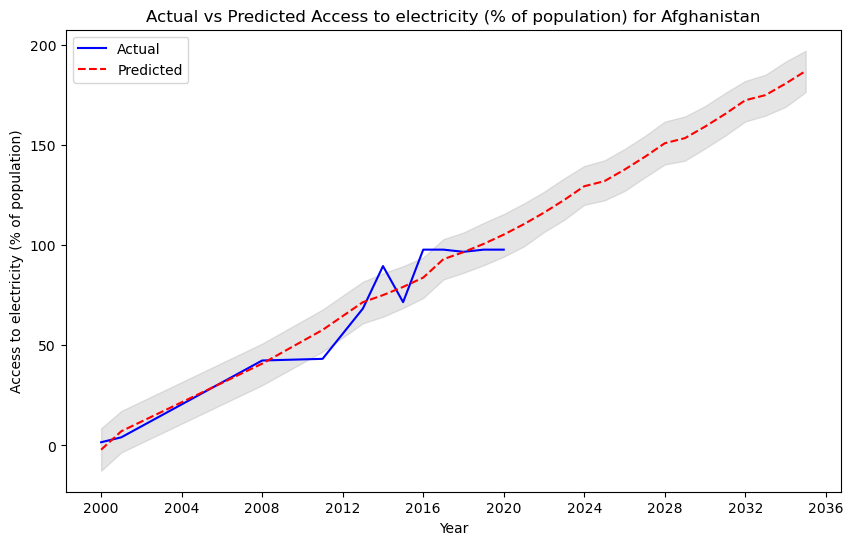

20:39:57 - cmdstanpy - INFO - Chain [1] start processing
20:39:57 - cmdstanpy - INFO - Chain [1] done processing


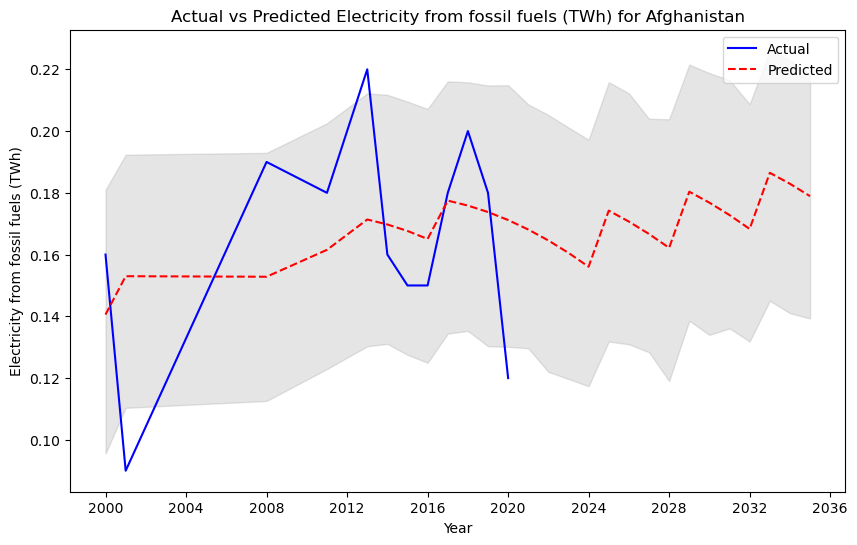

20:39:57 - cmdstanpy - INFO - Chain [1] start processing
20:39:57 - cmdstanpy - INFO - Chain [1] done processing


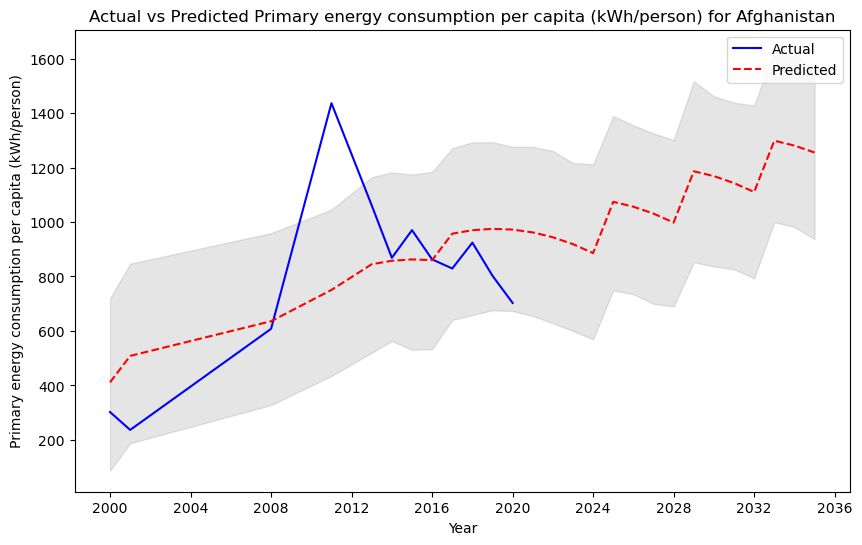

20:39:57 - cmdstanpy - INFO - Chain [1] start processing
20:39:57 - cmdstanpy - INFO - Chain [1] done processing


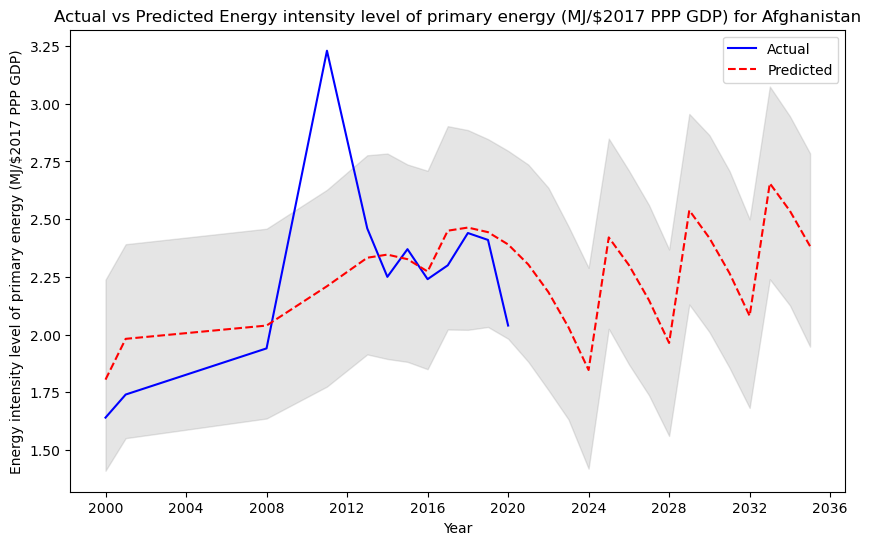

20:39:58 - cmdstanpy - INFO - Chain [1] start processing
20:39:58 - cmdstanpy - INFO - Chain [1] done processing


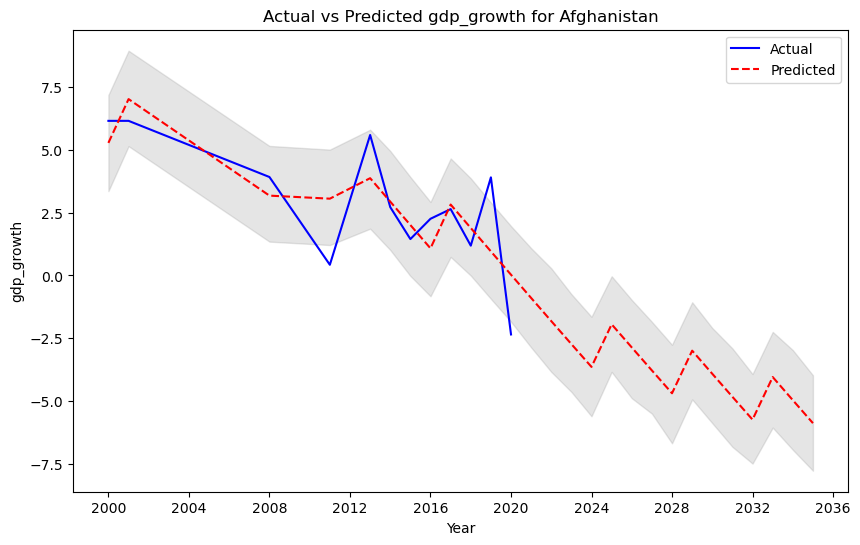

20:39:58 - cmdstanpy - INFO - Chain [1] start processing
20:39:59 - cmdstanpy - INFO - Chain [1] done processing


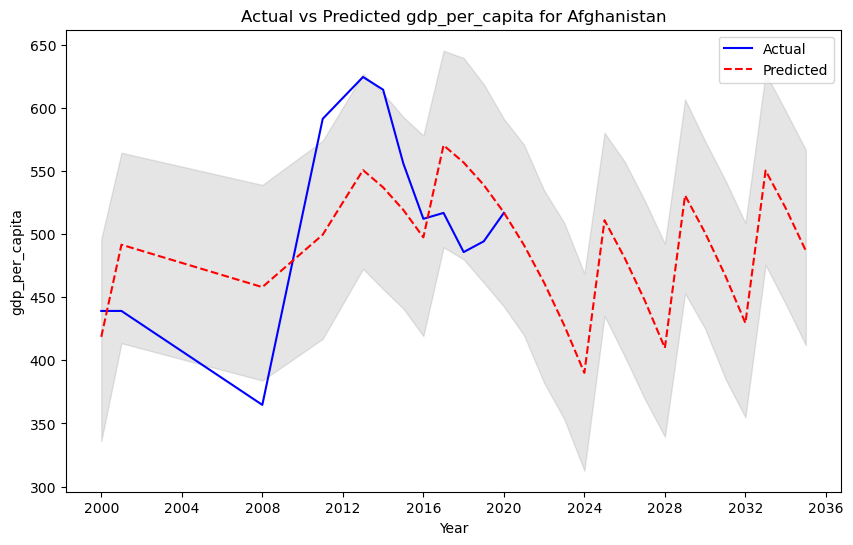

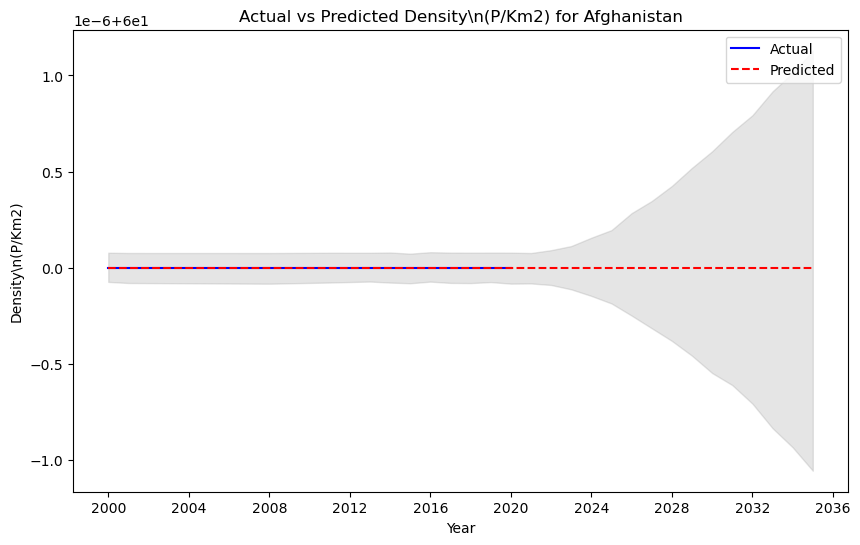

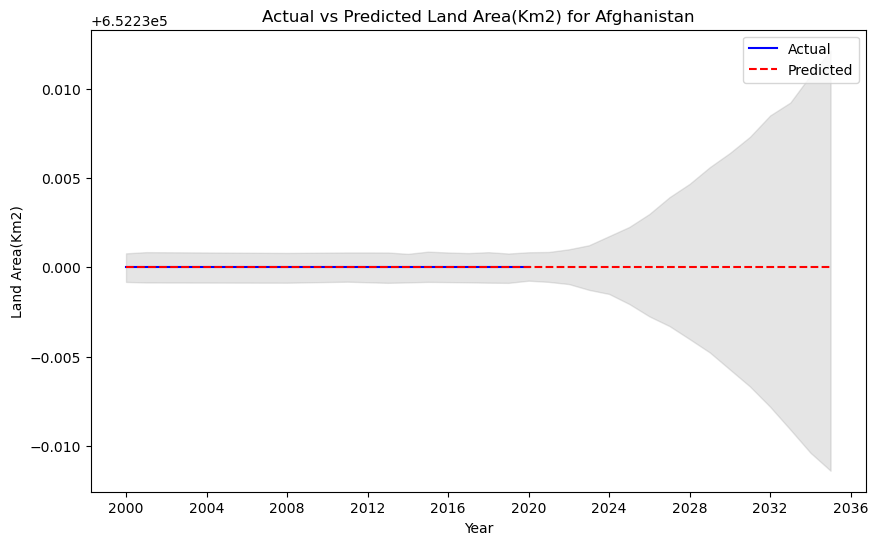

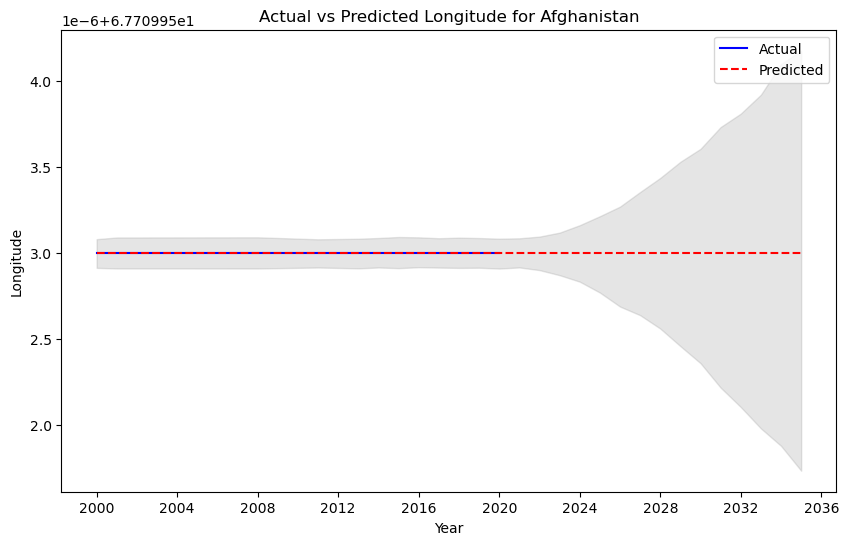

20:40:00 - cmdstanpy - INFO - Chain [1] start processing
20:40:00 - cmdstanpy - INFO - Chain [1] done processing


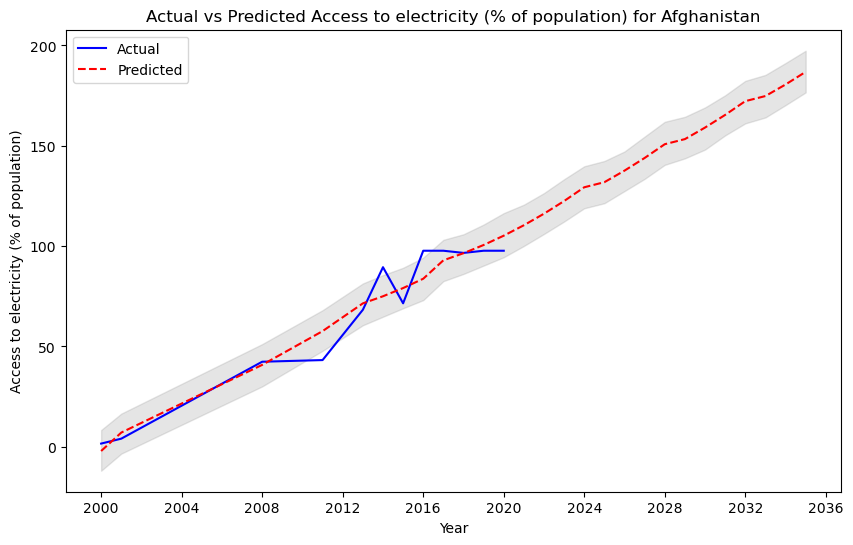

20:40:00 - cmdstanpy - INFO - Chain [1] start processing
20:40:00 - cmdstanpy - INFO - Chain [1] done processing


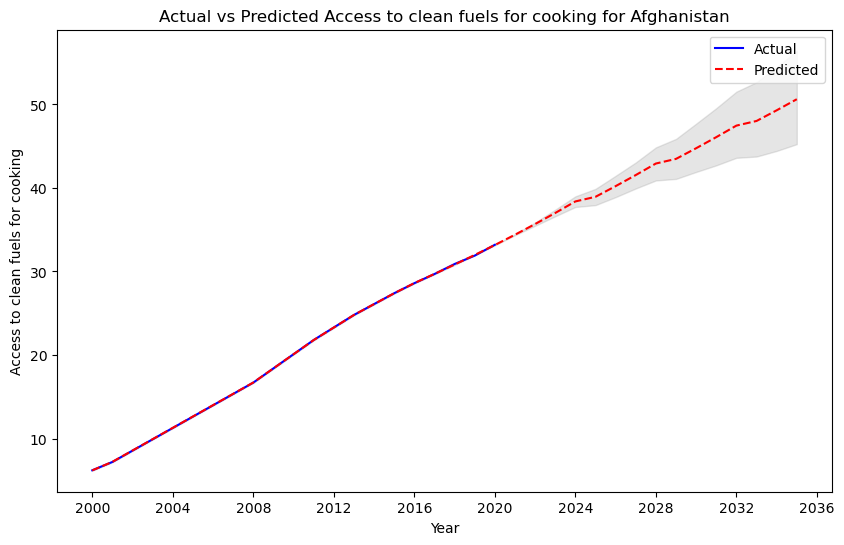

20:40:00 - cmdstanpy - INFO - Chain [1] start processing
20:40:01 - cmdstanpy - INFO - Chain [1] done processing


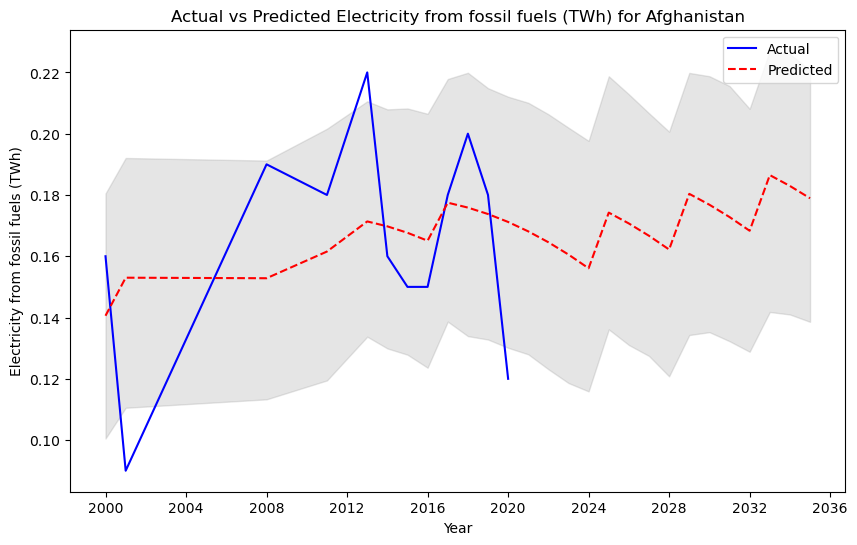

20:40:01 - cmdstanpy - INFO - Chain [1] start processing
20:40:01 - cmdstanpy - INFO - Chain [1] done processing


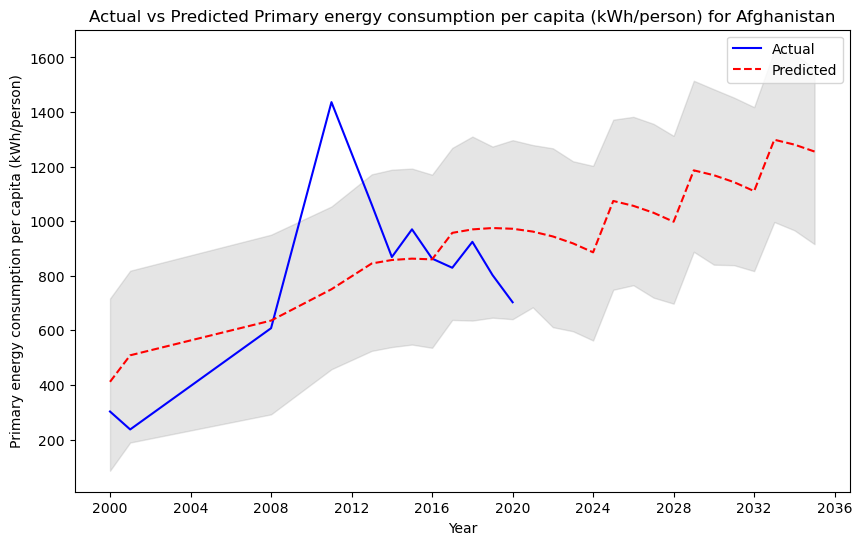

20:40:01 - cmdstanpy - INFO - Chain [1] start processing
20:40:01 - cmdstanpy - INFO - Chain [1] done processing


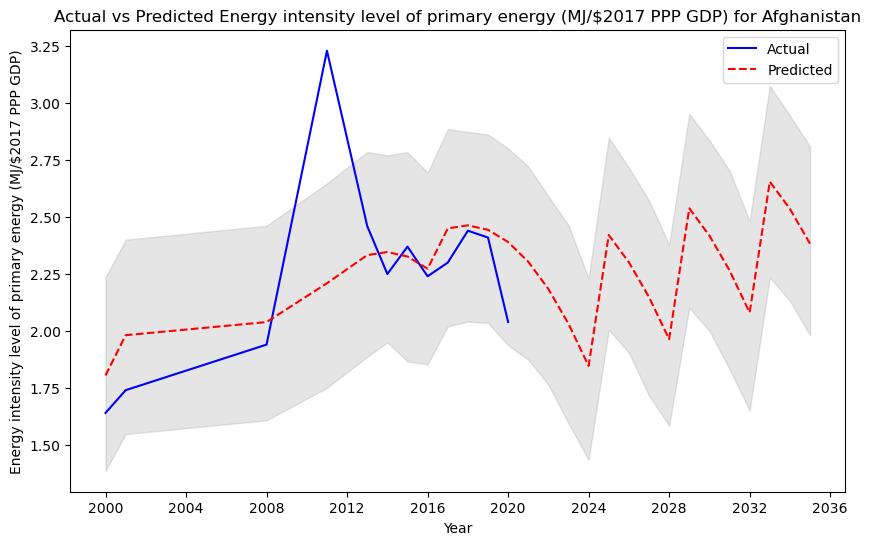

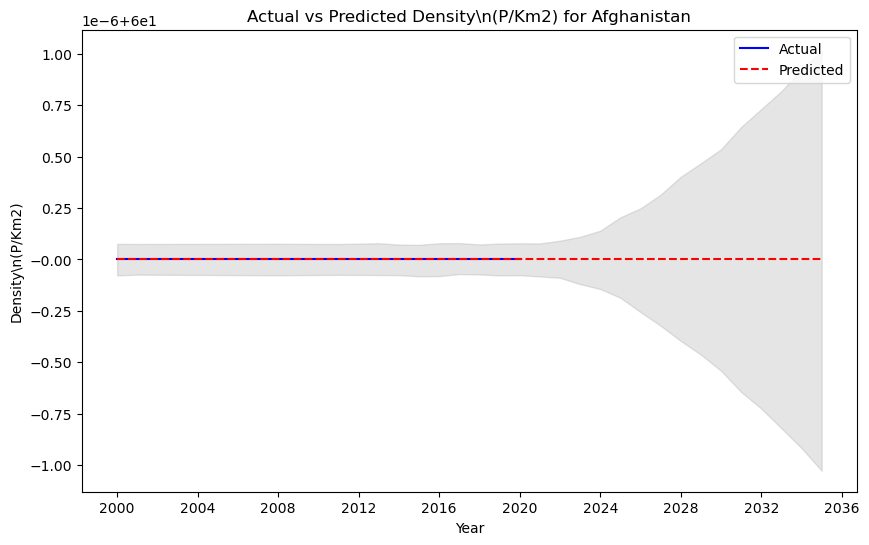

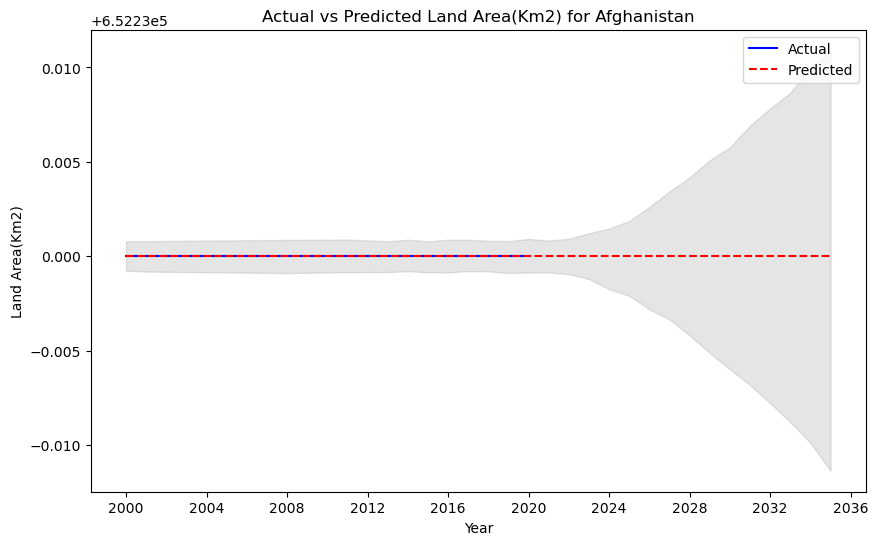

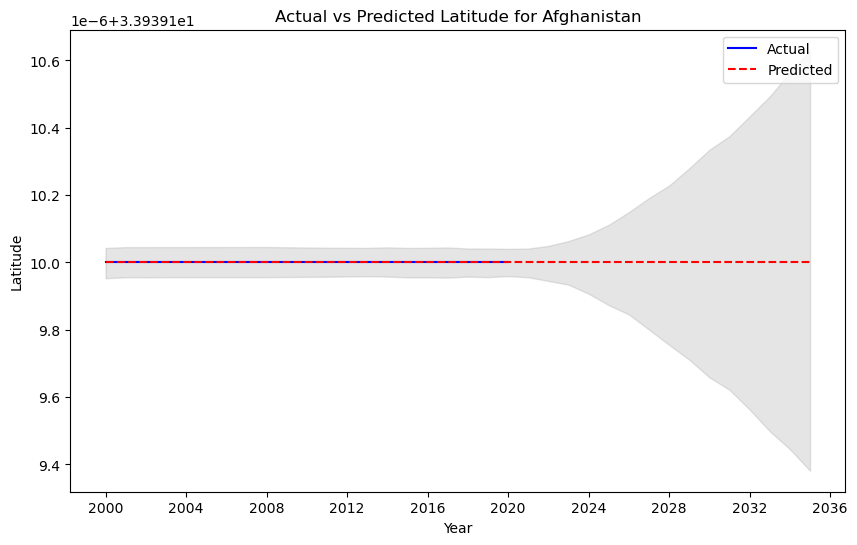

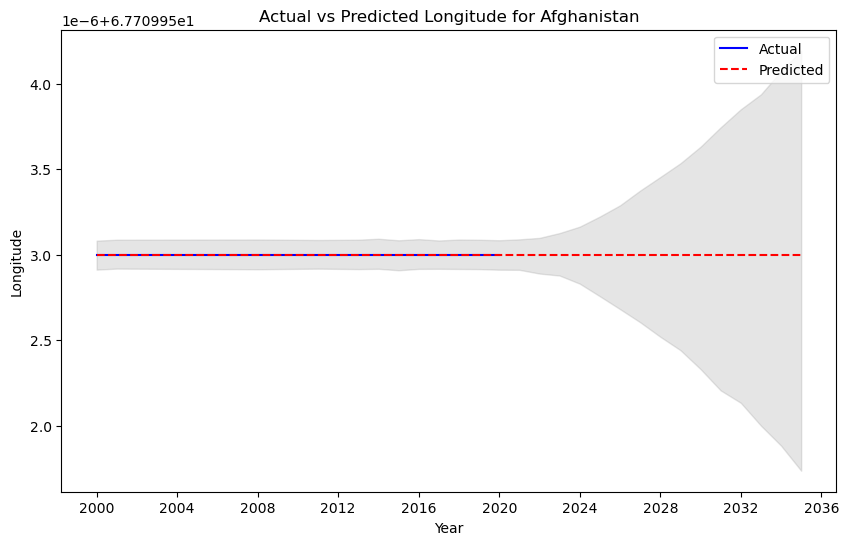

In [240]:
predicted_values = predict_all_variables('Afghanistan', data_1, 2022 )
input_data=predicted_values

In [241]:
predicted_values

{'co2_emission': {'Access to electricity (% of population)': 122.45764636702941,
  'Electricity from fossil fuels (TWh)': 0.1605534732041292,
  'Primary energy consumption per capita (kWh/person)': 918.6429215663604,
  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 2.0315563916623187,
  'gdp_growth': -2.733936660319392,
  'gdp_per_capita': 427.6447736682825,
  'Density\\n(P/Km2)': 60.0,
  'Land Area(Km2)': 652230.0,
  'Longitude': 67.709953},
 'renewable_energy_percentage': {'Access to electricity (% of population)': 122.45764636702941,
  'Access to clean fuels for cooking': 37.004918348907175,
  'Electricity from fossil fuels (TWh)': 0.1605534732041292,
  'Primary energy consumption per capita (kWh/person)': 918.6429215663604,
  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 2.0315563916623187,
  'Density\\n(P/Km2)': 60.0,
  'Land Area(Km2)': 652230.0,
  'Latitude': 33.93911,
  'Longitude': 67.709953}}

In [242]:
extra_columns=['co2_emission','renewable_energy_percentage']

In [243]:
for column in extra_columns:
   input_data[column]['Year']=2022
   input_data[column]['Entity']=label_mapping['Afghanistan']

In [244]:
input_data

{'co2_emission': {'Access to electricity (% of population)': 122.45764636702941,
  'Electricity from fossil fuels (TWh)': 0.1605534732041292,
  'Primary energy consumption per capita (kWh/person)': 918.6429215663604,
  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 2.0315563916623187,
  'gdp_growth': -2.733936660319392,
  'gdp_per_capita': 427.6447736682825,
  'Density\\n(P/Km2)': 60.0,
  'Land Area(Km2)': 652230.0,
  'Longitude': 67.709953,
  'Year': 2022,
  'Entity': 0},
 'renewable_energy_percentage': {'Access to electricity (% of population)': 122.45764636702941,
  'Access to clean fuels for cooking': 37.004918348907175,
  'Electricity from fossil fuels (TWh)': 0.1605534732041292,
  'Primary energy consumption per capita (kWh/person)': 918.6429215663604,
  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 2.0315563916623187,
  'Density\\n(P/Km2)': 60.0,
  'Land Area(Km2)': 652230.0,
  'Latitude': 33.93911,
  'Longitude': 67.709953,
  'Year': 2022,
  'En

In [245]:
loaded_model_list=['./Random forest regressor model for Value_co2_emissions_kt_by_country', './Random forest regressor model for Renewable energy share in the total final energy consumption (%)']

In [246]:
# Convert each inner dictionary to a DataFrame
df_co2_emission = pd.DataFrame([input_data['co2_emission']])
df_renewable_energy_percentage = pd.DataFrame([input_data['renewable_energy_percentage']])

model_1=joblib.load(loaded_model_list[0])
model_2=joblib.load(loaded_model_list[1])

df_co2_emission=df_co2_emission[random_forest_features[0]]
predicted_value_1 = model_1.predict(df_co2_emission)
print(f"The predicted value of the co_2 emission  is: {predicted_value_1[0]}")

df_renewable_energy_percentage=df_renewable_energy_percentage[random_forest_features[1]]
predicted_value_2 = model_2.predict(df_renewable_energy_percentage)
print(f"The predicted value of the renewable energy consumption  is: {predicted_value_2[0]}")

The predicted value of the co_2 emission  is: 5273.090049616102
The predicted value of the renewable energy consumption  is: 21.57236500000001


# Neural Network Training

In [247]:
!pip install tensorflow

In [248]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [249]:
data.columns.to_list()

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude',
 'Country_Decoded']

In [250]:
target_variables=['Value_co2_emissions_kt_by_country','Renewable energy share in the total final energy consumption (%)']

In [251]:
correlation_matrix =  data.select_dtypes("number").corr()
target_features = correlation_matrix[target_variables[0]].drop(target_variables[0])
target_features = target_features[abs(target_features)>0.3].index.tolist()

In [252]:
from sklearn.preprocessing import StandardScaler

columns=['Electricity from fossil fuels (TWh)', 'Land Area(Km2)','Value_co2_emissions_kt_by_country','Renewable energy share in the total final energy consumption (%)']

scaler=StandardScaler()
data[columns]=scaler.fit_transform(data[columns])

In [253]:
from sklearn.model_selection import train_test_split

X=data[target_features]
y=data[target_variables[0]]

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42, test_size=0.2)

In [254]:
neural_network=keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [255]:
neural_network.compile(optimizer='adam', loss='mean_squared_error')

In [256]:
history = neural_network.fit(X_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - loss: 0.4220 
Epoch 2/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.2049
Epoch 3/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.0960
Epoch 4/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.0325
Epoch 5/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.0320
Epoch 6/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0330
Epoch 7/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.0253
Epoch 8/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.0273
Epoch 9/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.0247
Epoch 10/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.0214
Epoch 11/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.0332
Epoch 12/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.0331
Epoch 13/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0267
Epoch 14/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.0276
Epoch 15/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - l

In [257]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



y_pred=neural_network.predict(X_test)
# Make predictions
y_pred_train = neural_network.predict(X_train)



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step


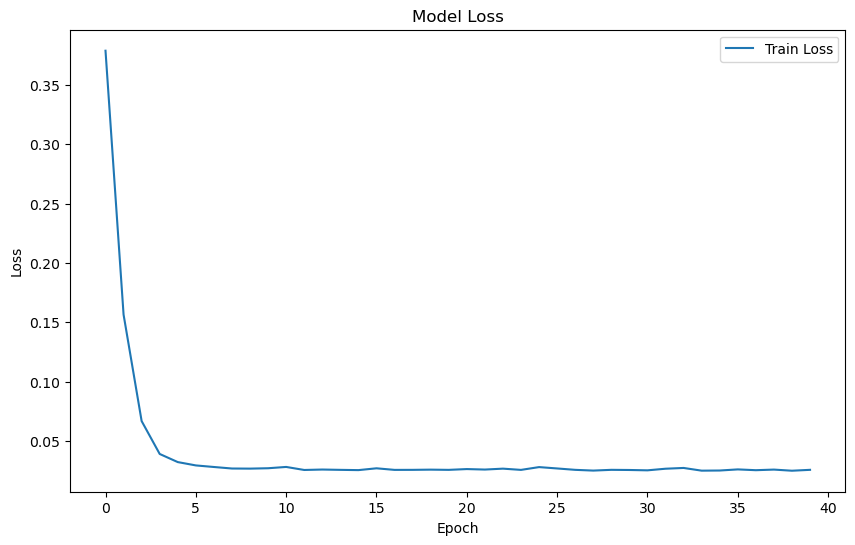

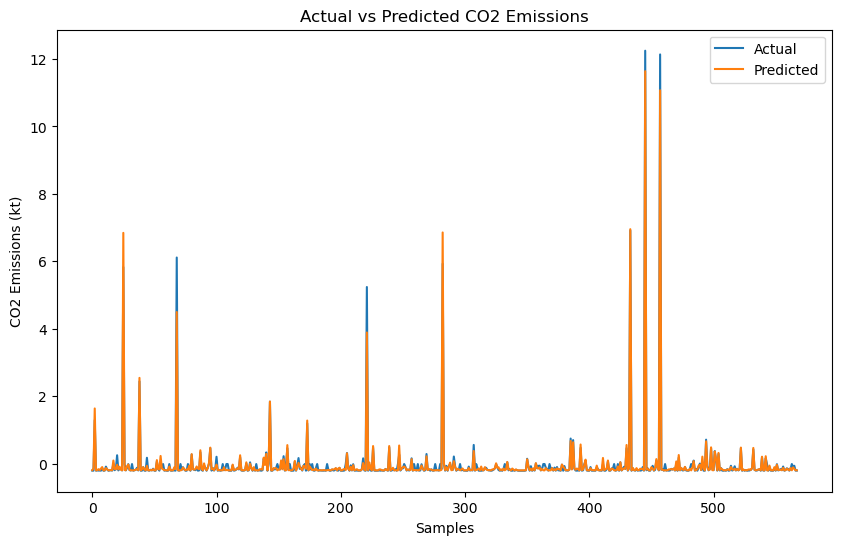

In [258]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted CO2 Emissions')
plt.ylabel('CO2 Emissions (kt)')
plt.xlabel('Samples')
plt.legend()
plt.show()

In [259]:
# calculating the scores based on the performance of the neural network

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean squared error (same as neural_network.evaluate()) is: {mse}")
print(f"Mean absolute error is: {mae}")
print(f"R2 score error is: {r2}")

Mean squared error (same as neural_network.evaluate()) is: 0.01762707937472286
Mean absolute error is: 0.04660445293950999
R2 score error is: 0.9804559009153441


In [260]:
test_loss = neural_network.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.0252
Test Loss: 0.0176
